In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras 
from keras import Sequential
from keras.layers import Dense,Dropout
from sklearn.metrics import mean_squared_error
import pandas as pd

2022-11-09 14:12:14.167710: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-09 14:12:15.628133: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-11-09 14:12:16.315086: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-09 14:12:16.315127: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

In [386]:
train = pd.read_csv("train.csv", index_col = 0)
test = pd.read_csv("test.csv", index_col = 0)



In [387]:
train.corr()['ctnum_random']

V1                    -0.025067
V2                    -0.061585
V3                    -0.098421
V4                    -0.082355
V5                     0.017850
                         ...   
batch_S               -0.014340
batch_T               -0.024370
batch_U                0.069351
ctnum_median_status    0.758797
infection             -0.135144
Name: ctnum_random, Length: 74, dtype: float64

In [384]:
#X_train= train.drop(['V1','V2','V3','V4','V5','V8','V12','V20','V22','V27','V31','V34','V36','V38','V39','V41','V42','V13','V14','V37','agenum_random'
                  # ,'V44','V45','V48','V50','batch_N', 'batch_O', 'batch_P', 'batch_Q',
       #'batch_R', 'batch_S', 'batch_T','batch_H', 'batch_I', 'batch_J', 'batch_K',
       #'batch_L','batch_B','batch_C','batch_E','batch_F','batch_G','batch_U', 'batch_M', 'batch_N','ctnum_random','batch_D'], axis = 1)

In [390]:
X_train = train.drop(['ctnum_random', 'batch_D'], axis = 1)

In [391]:
X_test = test.drop(['ctnum_random', 'V19'], axis = 1)

In [392]:
#X_test= test.drop(['V1','V2','V3','V4','V5','V8','V12','V20','V22','V27','V31','V34','V36','V38','V39','V41','V42','V13','V14','V37','agenum_random',
      #             'V44','V45','V48','V50','batch_N', 'batch_O', 'batch_P', 'batch_Q',
      # 'batch_R', 'batch_S', 'batch_T','batch_H', 'batch_I', 'batch_J', 'batch_K',
      # 'batch_L','batch_B','batch_C','batch_E','batch_F','batch_G','batch_U', 'batch_M', 'batch_N','ctnum_random','V19'], axis = 1)

In [393]:
y_train = train['ctnum_random']
y_test = test['ctnum_random']

In [394]:
X_train.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V20', 'V21', 'V22',
       'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32',
       'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42',
       'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'agenum_random',
       'batch_A', 'batch_B', 'batch_C', 'batch_E', 'batch_F', 'batch_G',
       'batch_H', 'batch_I', 'batch_J', 'batch_K', 'batch_L', 'batch_M',
       'batch_N', 'batch_O', 'batch_P', 'batch_Q', 'batch_R', 'batch_S',
       'batch_T', 'batch_U', 'ctnum_median_status', 'infection'],
      dtype='object')

In [395]:
X_test.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V20', 'V21', 'V22',
       'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32',
       'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42',
       'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'agenum_random',
       'batch_A', 'batch_B', 'batch_C', 'batch_E', 'batch_F', 'batch_G',
       'batch_H', 'batch_I', 'batch_J', 'batch_K', 'batch_L', 'batch_M',
       'batch_N', 'batch_O', 'batch_P', 'batch_Q', 'batch_R', 'batch_S',
       'batch_T', 'batch_U', 'ctnum_median_status', 'infection'],
      dtype='object')

In [396]:
train_concat = pd.concat([X_train, y_train],axis = 1)

In [397]:
train_concat.corr()['ctnum_random']

V1                    -0.025067
V2                    -0.061585
V3                    -0.098421
V4                    -0.082355
V5                     0.017850
                         ...   
batch_T               -0.024370
batch_U                0.069351
ctnum_median_status    0.758797
infection             -0.135144
ctnum_random           1.000000
Name: ctnum_random, Length: 73, dtype: float64

In [398]:
X_test

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,batch_N,batch_O,batch_P,batch_Q,batch_R,batch_S,batch_T,batch_U,ctnum_median_status,infection
418,0.416963,0.181283,0.064580,-0.256586,-0.022616,-0.317925,0.376913,0.086584,-0.255495,0.096489,...,0,0,0,0,0,0,1,0,1,1
474,0.199633,0.206295,0.288382,-0.150975,0.394386,0.075909,-0.368996,0.323212,0.079250,0.018757,...,0,0,0,0,0,1,0,0,0,0
181,-0.431797,-0.050736,0.030278,-0.117923,0.246983,-0.160531,-0.197276,0.083967,0.028719,-0.148602,...,0,0,0,1,0,0,0,0,0,1
446,-0.379012,0.039950,0.292831,0.174339,0.256258,-0.020767,-0.409595,0.085018,0.011241,0.117534,...,0,0,0,0,0,1,0,0,1,0
297,0.451459,-0.048828,-0.089349,-0.151467,0.136524,-0.169697,0.116059,-0.235683,-0.048781,0.168612,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31,-0.345858,-0.184016,-0.267976,-0.402239,-0.146177,-0.190639,-0.219773,-0.240624,-0.278037,-0.276137,...,0,0,0,0,0,0,0,0,0,1
113,-0.437532,-0.172444,-0.003209,-0.007867,-0.018803,-0.055248,-0.353687,0.062032,0.058762,-0.226611,...,0,0,0,0,0,0,0,0,0,1
272,0.085456,-0.017223,0.110324,-0.356316,0.245826,-0.166763,0.105081,-0.011678,-0.292295,-0.055272,...,0,0,1,0,0,0,0,0,0,1
311,-0.398452,-0.338095,-0.451013,-0.261519,-0.053643,-0.221453,-0.169615,-0.414323,-0.213793,-0.310667,...,0,0,0,0,0,0,0,0,1,1


In [399]:
from sklearn.preprocessing import StandardScaler

In [400]:
X_train.shape

(652, 72)

In [401]:
28*4

112

In [402]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [403]:
model = Sequential()
model.add(Dense(112, activation = 'relu', input_dim = X_train.shape[1]))
#model.add(Dense(64, activation = 'relu'))
#model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

In [404]:
model.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_265 (Dense)           (None, 112)               8176      
                                                                 
 dense_266 (Dense)           (None, 1)                 113       
                                                                 
Total params: 8,289
Trainable params: 8,289
Non-trainable params: 0
_________________________________________________________________


In [405]:
model.compile(loss = 'mean_squared_error',optimizer = 'Adam')

In [406]:
history = model.fit(X_train,y_train, epochs = 100,batch_size = 32, validation_split = 0.2)

Epoch 1/100
17/17 [==============================] - 0s 8ms/step - loss: 431.2144 - val_loss: 439.8659
Epoch 2/100
17/17 [==============================] - 0s 3ms/step - loss: 361.0600 - val_loss: 380.5449
Epoch 3/100
17/17 [==============================] - 0s 3ms/step - loss: 291.2898 - val_loss: 319.3177
Epoch 4/100
17/17 [==============================] - 0s 3ms/step - loss: 222.1038 - val_loss: 259.7809
Epoch 5/100
17/17 [==============================] - 0s 3ms/step - loss: 161.0265 - val_loss: 205.9162
Epoch 6/100
17/17 [==============================] - 0s 3ms/step - loss: 116.2801 - val_loss: 160.2798
Epoch 7/100
17/17 [==============================] - 0s 3ms/step - loss: 88.0735 - val_loss: 127.7071
Epoch 8/100
17/17 [==============================] - 0s 3ms/step - loss: 71.4112 - val_loss: 105.9603
Epoch 9/100
17/17 [==============================] - 0s 3ms/step - loss: 60.4330 - val_loss: 91.5364
Epoch 10/100
17/17 [==============================] - 0s 3ms/step - loss: 52.

17/17 [==============================] - 0s 3ms/step - loss: 1.7070 - val_loss: 3.8448
Epoch 83/100
17/17 [==============================] - 0s 3ms/step - loss: 1.6582 - val_loss: 3.7948
Epoch 84/100
17/17 [==============================] - 0s 3ms/step - loss: 1.5999 - val_loss: 3.7646
Epoch 85/100
17/17 [==============================] - 0s 3ms/step - loss: 1.5643 - val_loss: 3.8264
Epoch 86/100
17/17 [==============================] - 0s 3ms/step - loss: 1.5144 - val_loss: 3.6698
Epoch 87/100
17/17 [==============================] - 0s 3ms/step - loss: 1.5042 - val_loss: 3.7040
Epoch 88/100
17/17 [==============================] - 0s 3ms/step - loss: 1.4714 - val_loss: 3.8223
Epoch 89/100
17/17 [==============================] - 0s 3ms/step - loss: 1.4451 - val_loss: 3.4700
Epoch 90/100
17/17 [==============================] - 0s 3ms/step - loss: 1.3535 - val_loss: 3.5493
Epoch 91/100
17/17 [==============================] - 0s 3ms/step - loss: 1.3555 - val_loss: 3.4364
Epoch 92/100


In [407]:
y_pred = model.predict(X_test)

4/4 [==============================] - 0s 1ms/step


In [28]:
import keras_tuner as kt

In [166]:
def build_model(hp):
    model = Sequential()
    model.add(Dense(128,activation = 'relu', input_dim = X_train.shape[1]))
    model.add(Dense(1, activation = 'linear'))
    optimizer = hp.Choice('optimizer',values = ['adam','sgd','adadelta'])
    model.compile(optimizer = optimizer, loss= 'mse')
    
    return model
    

In [167]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=5,
    directory='anything')

INFO:tensorflow:Reloading Oracle from existing project anything/untitled_project/oracle.json
INFO:tensorflow:Reloading Tuner from anything/untitled_project/tuner0.json


In [168]:
tuner.search(X_train, y_train, epochs = 5, validation_data = (X_test,y_test))


Search: Running Trial #4

Value             |Best Value So Far |Hyperparameter
rmsrop            |adam              |optimizer



Traceback (most recent call last):
  File "/home/abuzar/anaconda3/lib/python3.9/site-packages/keras_tuner/engine/tuner.py", line 158, in _try_build
    model = self._build_hypermodel(hp)
  File "/home/abuzar/anaconda3/lib/python3.9/site-packages/keras_tuner/engine/tuner.py", line 146, in _build_hypermodel
    model = self.hypermodel.build(hp)
  File "/tmp/ipykernel_2578/621844710.py", line 6, in build_model
    model.compile(optimizer = optimizer, loss= 'mse')
  File "/home/abuzar/anaconda3/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/abuzar/anaconda3/lib/python3.9/site-packages/keras/utils/generic_utils.py", line 605, in class_and_config_for_serialized_keras_object
    raise ValueError(
ValueError: Unknown optimizer: rmsrop. Please ensure this object is passed to the `custom_objects` argument. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_obj

Invalid model 0/5


Traceback (most recent call last):
  File "/home/abuzar/anaconda3/lib/python3.9/site-packages/keras_tuner/engine/tuner.py", line 158, in _try_build
    model = self._build_hypermodel(hp)
  File "/home/abuzar/anaconda3/lib/python3.9/site-packages/keras_tuner/engine/tuner.py", line 146, in _build_hypermodel
    model = self.hypermodel.build(hp)
  File "/tmp/ipykernel_2578/621844710.py", line 6, in build_model
    model.compile(optimizer = optimizer, loss= 'mse')
  File "/home/abuzar/anaconda3/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/abuzar/anaconda3/lib/python3.9/site-packages/keras/utils/generic_utils.py", line 605, in class_and_config_for_serialized_keras_object
    raise ValueError(
ValueError: Unknown optimizer: rmsrop. Please ensure this object is passed to the `custom_objects` argument. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_obj

Invalid model 1/5


Traceback (most recent call last):
  File "/home/abuzar/anaconda3/lib/python3.9/site-packages/keras_tuner/engine/tuner.py", line 158, in _try_build
    model = self._build_hypermodel(hp)
  File "/home/abuzar/anaconda3/lib/python3.9/site-packages/keras_tuner/engine/tuner.py", line 146, in _build_hypermodel
    model = self.hypermodel.build(hp)
  File "/tmp/ipykernel_2578/621844710.py", line 6, in build_model
    model.compile(optimizer = optimizer, loss= 'mse')
  File "/home/abuzar/anaconda3/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/abuzar/anaconda3/lib/python3.9/site-packages/keras/utils/generic_utils.py", line 605, in class_and_config_for_serialized_keras_object
    raise ValueError(
ValueError: Unknown optimizer: rmsrop. Please ensure this object is passed to the `custom_objects` argument. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_obj

Invalid model 2/5


Traceback (most recent call last):
  File "/home/abuzar/anaconda3/lib/python3.9/site-packages/keras_tuner/engine/tuner.py", line 158, in _try_build
    model = self._build_hypermodel(hp)
  File "/home/abuzar/anaconda3/lib/python3.9/site-packages/keras_tuner/engine/tuner.py", line 146, in _build_hypermodel
    model = self.hypermodel.build(hp)
  File "/tmp/ipykernel_2578/621844710.py", line 6, in build_model
    model.compile(optimizer = optimizer, loss= 'mse')
  File "/home/abuzar/anaconda3/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/abuzar/anaconda3/lib/python3.9/site-packages/keras/utils/generic_utils.py", line 605, in class_and_config_for_serialized_keras_object
    raise ValueError(
ValueError: Unknown optimizer: rmsrop. Please ensure this object is passed to the `custom_objects` argument. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_obj

Invalid model 3/5


Traceback (most recent call last):
  File "/home/abuzar/anaconda3/lib/python3.9/site-packages/keras_tuner/engine/tuner.py", line 158, in _try_build
    model = self._build_hypermodel(hp)
  File "/home/abuzar/anaconda3/lib/python3.9/site-packages/keras_tuner/engine/tuner.py", line 146, in _build_hypermodel
    model = self.hypermodel.build(hp)
  File "/tmp/ipykernel_2578/621844710.py", line 6, in build_model
    model.compile(optimizer = optimizer, loss= 'mse')
  File "/home/abuzar/anaconda3/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/abuzar/anaconda3/lib/python3.9/site-packages/keras/utils/generic_utils.py", line 605, in class_and_config_for_serialized_keras_object
    raise ValueError(
ValueError: Unknown optimizer: rmsrop. Please ensure this object is passed to the `custom_objects` argument. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_obj

Invalid model 4/5
Invalid model 5/5


Traceback (most recent call last):
  File "/home/abuzar/anaconda3/lib/python3.9/site-packages/keras_tuner/engine/tuner.py", line 158, in _try_build
    model = self._build_hypermodel(hp)
  File "/home/abuzar/anaconda3/lib/python3.9/site-packages/keras_tuner/engine/tuner.py", line 146, in _build_hypermodel
    model = self.hypermodel.build(hp)
  File "/tmp/ipykernel_2578/621844710.py", line 6, in build_model
    model.compile(optimizer = optimizer, loss= 'mse')
  File "/home/abuzar/anaconda3/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/abuzar/anaconda3/lib/python3.9/site-packages/keras/utils/generic_utils.py", line 605, in class_and_config_for_serialized_keras_object
    raise ValueError(
ValueError: Unknown optimizer: rmsrop. Please ensure this object is passed to the `custom_objects` argument. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_obj

RuntimeError: Too many failed attempts to build model.

In [170]:
tuner.get_best_hyperparameters()[0].values

{'optimizer': 'adam'}

In [172]:
tuner.get_best_models(num_models=1)[0]

In [173]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 112)               3248      
                                                                 
 dense_61 (Dense)            (None, 1)                 113       
                                                                 
Total params: 3,361
Trainable params: 3,361
Non-trainable params: 0
_________________________________________________________________


In [175]:
model.fit(X_train,y_train, batch_size = 1, epochs = 100, initial_epoch = 6, validation_data=(X_test,y_test))

Epoch 7/100
652/652 [==============================] - 1s 2ms/step - loss: 1.8141 - val_loss: 9.0863
Epoch 8/100
652/652 [==============================] - 1s 2ms/step - loss: 0.4677 - val_loss: 8.9642
Epoch 9/100
652/652 [==============================] - 1s 2ms/step - loss: 0.4343 - val_loss: 9.4730
Epoch 10/100
652/652 [==============================] - 1s 2ms/step - loss: 0.5537 - val_loss: 9.3772
Epoch 11/100
652/652 [==============================] - 1s 2ms/step - loss: 0.3896 - val_loss: 8.4205
Epoch 12/100
652/652 [==============================] - 1s 2ms/step - loss: 0.3709 - val_loss: 9.0370
Epoch 13/100
652/652 [==============================] - 1s 2ms/step - loss: 0.4619 - val_loss: 9.6004
Epoch 14/100
652/652 [==============================] - 1s 2ms/step - loss: 0.6188 - val_loss: 8.7561
Epoch 15/100
652/652 [==============================] - 1s 2ms/step - loss: 0.4929 - val_loss: 9.3585
Epoch 16/100
652/652 [==============================] - 1s 2ms/step - loss: 0.3548 - 

In [408]:
from sklearn.metrics import *

In [201]:
def build_model(hp):
    model = Sequential()
    units = hp.Int('units', min_value = 8,max_value = 128)
    model.add(Dense(units=units,activation = 'relu', input_dim = X_train.shape[1]))
    model.add(Dense(1, activation = 'linear'))
    
    #optimizer = hp.Choice('optimizer',values = ['adam','sgd','adadelta'])
    model.compile(optimizer = 'adam', loss= 'mse')
    
    return model
    

In [202]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=5,
    directory = 'mydir2'
   )

In [203]:
tuner.search(X_train, y_train, epochs = 100, validation_data = (X_test,y_test))

Trial 5 Complete [00h 00m 07s]
val_loss: 7.7587056159973145

Best val_loss So Far: 7.590597629547119
Total elapsed time: 00h 00m 37s
INFO:tensorflow:Oracle triggered exit


In [204]:
tuner.get_best_hyperparameters()[0].values

{'units': 94}

In [205]:
model = tuner.get_best_models(num_models = 1)[0]

In [206]:
model.fit(X_train,y_train, batch_size = 32, epochs = 200, initial_epoch = 6, validation_data=(X_test,y_test))

Epoch 7/200
21/21 [==============================] - 0s 7ms/step - loss: 2.0838 - val_loss: 7.5404
Epoch 8/200
21/21 [==============================] - 0s 3ms/step - loss: 2.0576 - val_loss: 7.4224
Epoch 9/200
21/21 [==============================] - 0s 2ms/step - loss: 2.0179 - val_loss: 7.4310
Epoch 10/200
21/21 [==============================] - 0s 3ms/step - loss: 2.0290 - val_loss: 7.3925
Epoch 11/200
21/21 [==============================] - 0s 2ms/step - loss: 1.9599 - val_loss: 7.3920
Epoch 12/200
21/21 [==============================] - 0s 2ms/step - loss: 1.9586 - val_loss: 7.2520
Epoch 13/200
21/21 [==============================] - 0s 2ms/step - loss: 1.9206 - val_loss: 7.1999
Epoch 14/200
21/21 [==============================] - 0s 3ms/step - loss: 1.8995 - val_loss: 7.1736
Epoch 15/200
21/21 [==============================] - 0s 3ms/step - loss: 1.8610 - val_loss: 7.5930
Epoch 16/200
21/21 [==============================] - 0s 3ms/step - loss: 1.8790 - val_loss: 7.1473
Epo

Epoch 89/200
21/21 [==============================] - 0s 2ms/step - loss: 0.8457 - val_loss: 6.5268
Epoch 90/200
21/21 [==============================] - 0s 3ms/step - loss: 0.8070 - val_loss: 6.4768
Epoch 91/200
21/21 [==============================] - 0s 3ms/step - loss: 0.8614 - val_loss: 6.6090
Epoch 92/200
21/21 [==============================] - 0s 2ms/step - loss: 0.8230 - val_loss: 6.5321
Epoch 93/200
21/21 [==============================] - 0s 2ms/step - loss: 0.7953 - val_loss: 6.3859
Epoch 94/200
21/21 [==============================] - 0s 3ms/step - loss: 0.7777 - val_loss: 6.7124
Epoch 95/200
21/21 [==============================] - 0s 3ms/step - loss: 0.8129 - val_loss: 6.4067
Epoch 96/200
21/21 [==============================] - 0s 3ms/step - loss: 0.7840 - val_loss: 6.4987
Epoch 97/200
21/21 [==============================] - 0s 3ms/step - loss: 0.7730 - val_loss: 6.4869
Epoch 98/200
21/21 [==============================] - 0s 2ms/step - loss: 0.7631 - val_loss: 6.5232


In [46]:
def build_model(hp):
    
    
    
    model = Sequential()
    
    
    counter = 0
    
    
    for i in range(hp.Int('num_layers', min_value = 1, max_value = 10)):
        
        
        if counter == 0:
            
            model.add(
                Dense(
                    hp.Int('units'+ str(i), min_value = 8, max_value = 128,step =8),
                    activation = hp.Choice('activation'+str(i), values = ['relu', 'tanh','sigmoid']),
                    input_dim = X_train.shape[1]))
            model.add(Dropout(hp.Choice('dropout' + str(i), values = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])))
        else:
            
            model.add(
                Dense(
                    hp.Int('units' + str(i), min_value = 8, max_value =  128,  step = 8), 
                    activation = hp.Choice('activation' + str(i), values =['relu', 'tanh','sigmoid']),
                )
            )
            model.add(Dropout(hp.Choice('dropout' + str(i), values = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])))
        counter+=1
        
        
    model.add(Dense(1,activation = 'linear'))
    model.compile(optimizer = hp.Choice('optimizer', values= ['rmsprop', 'adam','sgd','nadam','adadelta']),
                 loss = 'mean_squared_error')
    
    
    return model

In [48]:
tuner = kt.RandomSearch(build_model,
                       objective = 'val_loss',
                       max_trials = 3,
                       directory = 'mydirectx'
                       )

In [49]:
tuner.search(X_train,y_train, epochs = 100,validation_data = (X_test, y_test))

Trial 3 Complete [00h 00m 08s]
val_loss: 12.106362342834473

Best val_loss So Far: 8.762286186218262
Total elapsed time: 00h 00m 25s
INFO:tensorflow:Oracle triggered exit


In [50]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 9,
 'units0': 32,
 'activation0': 'relu',
 'dropout0': 0.2,
 'optimizer': 'rmsprop',
 'units1': 56,
 'activation1': 'tanh',
 'dropout1': 0.2,
 'units2': 16,
 'activation2': 'relu',
 'dropout2': 0.6,
 'units3': 120,
 'activation3': 'relu',
 'dropout3': 0.8,
 'units4': 48,
 'activation4': 'relu',
 'dropout4': 0.9,
 'units5': 88,
 'activation5': 'tanh',
 'dropout5': 0.2,
 'units6': 8,
 'activation6': 'relu',
 'dropout6': 0.1,
 'units7': 8,
 'activation7': 'relu',
 'dropout7': 0.1,
 'units8': 8,
 'activation8': 'relu',
 'dropout8': 0.1}

In [51]:
model = tuner.get_best_models(num_models = 1)[0]

In [52]:
model.fit(X_train,y_train, epochs = 1000,initial_epoch = 100, validation_data = (X_test, y_test))

Epoch 101/1000
21/21 [==============================] - 1s 8ms/step - loss: 18.8169 - val_loss: 10.8364
Epoch 102/1000
21/21 [==============================] - 0s 3ms/step - loss: 21.2706 - val_loss: 8.2201
Epoch 103/1000
21/21 [==============================] - 0s 3ms/step - loss: 18.4863 - val_loss: 9.6011
Epoch 104/1000
21/21 [==============================] - 0s 3ms/step - loss: 16.8724 - val_loss: 9.6315
Epoch 105/1000
21/21 [==============================] - 0s 4ms/step - loss: 18.5367 - val_loss: 9.9372
Epoch 106/1000
21/21 [==============================] - 0s 3ms/step - loss: 20.4939 - val_loss: 10.0882
Epoch 107/1000
21/21 [==============================] - 0s 4ms/step - loss: 20.3882 - val_loss: 10.8002
Epoch 108/1000
21/21 [==============================] - 0s 3ms/step - loss: 18.5420 - val_loss: 7.5984
Epoch 109/1000
21/21 [==============================] - 0s 3ms/step - loss: 18.9904 - val_loss: 9.9975
Epoch 110/1000
21/21 [==============================] - 0s 4ms/step - 

21/21 [==============================] - 0s 4ms/step - loss: 13.8198 - val_loss: 11.9214
Epoch 181/1000
21/21 [==============================] - 0s 3ms/step - loss: 15.0045 - val_loss: 9.0311
Epoch 182/1000
21/21 [==============================] - 0s 3ms/step - loss: 16.4226 - val_loss: 9.1358
Epoch 183/1000
21/21 [==============================] - 0s 4ms/step - loss: 14.2019 - val_loss: 10.5780
Epoch 184/1000
21/21 [==============================] - 0s 4ms/step - loss: 14.2111 - val_loss: 10.1087
Epoch 185/1000
21/21 [==============================] - 0s 4ms/step - loss: 15.9045 - val_loss: 8.5531
Epoch 186/1000
21/21 [==============================] - 0s 4ms/step - loss: 15.3118 - val_loss: 11.0982
Epoch 187/1000
21/21 [==============================] - 0s 4ms/step - loss: 15.9153 - val_loss: 14.2047
Epoch 188/1000
21/21 [==============================] - 0s 4ms/step - loss: 14.6294 - val_loss: 8.2152
Epoch 189/1000
21/21 [==============================] - 0s 4ms/step - loss: 14.0143

21/21 [==============================] - 0s 4ms/step - loss: 13.9806 - val_loss: 9.6039
Epoch 260/1000
21/21 [==============================] - 0s 4ms/step - loss: 12.0889 - val_loss: 10.6910
Epoch 261/1000
21/21 [==============================] - 0s 4ms/step - loss: 13.2131 - val_loss: 6.3482
Epoch 262/1000
21/21 [==============================] - 0s 4ms/step - loss: 11.4207 - val_loss: 7.7306
Epoch 263/1000
21/21 [==============================] - 0s 3ms/step - loss: 11.4015 - val_loss: 9.0409
Epoch 264/1000
21/21 [==============================] - 0s 4ms/step - loss: 13.1793 - val_loss: 9.0111
Epoch 265/1000
21/21 [==============================] - 0s 4ms/step - loss: 12.7885 - val_loss: 7.6920
Epoch 266/1000
21/21 [==============================] - 0s 4ms/step - loss: 12.4659 - val_loss: 8.6118
Epoch 267/1000
21/21 [==============================] - 0s 4ms/step - loss: 13.4938 - val_loss: 8.7389
Epoch 268/1000
21/21 [==============================] - 0s 4ms/step - loss: 10.8043 - v

21/21 [==============================] - 0s 3ms/step - loss: 10.2392 - val_loss: 7.8582
Epoch 339/1000
21/21 [==============================] - 0s 4ms/step - loss: 10.7443 - val_loss: 7.5566
Epoch 340/1000
21/21 [==============================] - 0s 4ms/step - loss: 10.8555 - val_loss: 9.2969
Epoch 341/1000
21/21 [==============================] - 0s 4ms/step - loss: 10.7239 - val_loss: 7.6255
Epoch 342/1000
21/21 [==============================] - 0s 4ms/step - loss: 11.0827 - val_loss: 6.0695
Epoch 343/1000
21/21 [==============================] - 0s 4ms/step - loss: 10.0426 - val_loss: 9.5246
Epoch 344/1000
21/21 [==============================] - 0s 4ms/step - loss: 11.3561 - val_loss: 9.6596
Epoch 345/1000
21/21 [==============================] - 0s 4ms/step - loss: 11.8268 - val_loss: 7.9352
Epoch 346/1000
21/21 [==============================] - 0s 4ms/step - loss: 9.6303 - val_loss: 8.7568
Epoch 347/1000
21/21 [==============================] - 0s 4ms/step - loss: 10.7902 - val

Epoch 418/1000
21/21 [==============================] - 0s 3ms/step - loss: 10.5621 - val_loss: 7.8473
Epoch 419/1000
21/21 [==============================] - 0s 4ms/step - loss: 9.7350 - val_loss: 8.5753
Epoch 420/1000
21/21 [==============================] - 0s 4ms/step - loss: 9.8511 - val_loss: 8.6753
Epoch 421/1000
21/21 [==============================] - 0s 4ms/step - loss: 10.4207 - val_loss: 6.5514
Epoch 422/1000
21/21 [==============================] - 0s 4ms/step - loss: 10.6309 - val_loss: 7.4321
Epoch 423/1000
21/21 [==============================] - 0s 4ms/step - loss: 9.3866 - val_loss: 6.5030
Epoch 424/1000
21/21 [==============================] - 0s 4ms/step - loss: 9.1141 - val_loss: 7.7406
Epoch 425/1000
21/21 [==============================] - 0s 4ms/step - loss: 9.4829 - val_loss: 7.8565
Epoch 426/1000
21/21 [==============================] - 0s 4ms/step - loss: 10.8633 - val_loss: 7.6690
Epoch 427/1000
21/21 [==============================] - 0s 4ms/step - loss: 9.

21/21 [==============================] - 0s 4ms/step - loss: 9.2002 - val_loss: 5.3827
Epoch 499/1000
21/21 [==============================] - 0s 4ms/step - loss: 8.5346 - val_loss: 6.3515
Epoch 500/1000
21/21 [==============================] - 0s 4ms/step - loss: 9.4308 - val_loss: 5.4794
Epoch 501/1000
21/21 [==============================] - 0s 4ms/step - loss: 8.7390 - val_loss: 6.1711
Epoch 502/1000
21/21 [==============================] - 0s 4ms/step - loss: 8.4494 - val_loss: 6.3992
Epoch 503/1000
21/21 [==============================] - 0s 4ms/step - loss: 7.6376 - val_loss: 5.3830
Epoch 504/1000
21/21 [==============================] - 0s 4ms/step - loss: 7.6931 - val_loss: 6.1238
Epoch 505/1000
21/21 [==============================] - 0s 4ms/step - loss: 8.3911 - val_loss: 6.7501
Epoch 506/1000
21/21 [==============================] - 0s 4ms/step - loss: 9.4081 - val_loss: 5.4796
Epoch 507/1000
21/21 [==============================] - 0s 4ms/step - loss: 8.3668 - val_loss: 6.

21/21 [==============================] - 0s 4ms/step - loss: 8.3252 - val_loss: 5.6206
Epoch 579/1000
21/21 [==============================] - 0s 4ms/step - loss: 7.9322 - val_loss: 4.9352
Epoch 580/1000
21/21 [==============================] - 0s 4ms/step - loss: 7.8182 - val_loss: 6.3537
Epoch 581/1000
21/21 [==============================] - 0s 3ms/step - loss: 7.9889 - val_loss: 6.0127
Epoch 582/1000
21/21 [==============================] - 0s 4ms/step - loss: 8.9626 - val_loss: 5.9230
Epoch 583/1000
21/21 [==============================] - 0s 4ms/step - loss: 8.0963 - val_loss: 5.4829
Epoch 584/1000
21/21 [==============================] - 0s 4ms/step - loss: 8.1995 - val_loss: 5.6147
Epoch 585/1000
21/21 [==============================] - 0s 4ms/step - loss: 8.1760 - val_loss: 5.5591
Epoch 586/1000
21/21 [==============================] - 0s 4ms/step - loss: 8.1976 - val_loss: 5.6389
Epoch 587/1000
21/21 [==============================] - 0s 4ms/step - loss: 7.6928 - val_loss: 6.

21/21 [==============================] - 0s 4ms/step - loss: 7.9056 - val_loss: 5.1918
Epoch 659/1000
21/21 [==============================] - 0s 4ms/step - loss: 7.8194 - val_loss: 4.8661
Epoch 660/1000
21/21 [==============================] - 0s 4ms/step - loss: 7.7755 - val_loss: 5.3990
Epoch 661/1000
21/21 [==============================] - 0s 3ms/step - loss: 8.1371 - val_loss: 5.3901
Epoch 662/1000
21/21 [==============================] - 0s 4ms/step - loss: 7.7560 - val_loss: 5.3824
Epoch 663/1000
21/21 [==============================] - 0s 4ms/step - loss: 7.1103 - val_loss: 4.7654
Epoch 664/1000
21/21 [==============================] - 0s 4ms/step - loss: 7.3558 - val_loss: 4.7482
Epoch 665/1000
21/21 [==============================] - 0s 4ms/step - loss: 7.6279 - val_loss: 5.5805
Epoch 666/1000
21/21 [==============================] - 0s 4ms/step - loss: 8.3400 - val_loss: 4.7787
Epoch 667/1000
21/21 [==============================] - 0s 4ms/step - loss: 6.8477 - val_loss: 5.

21/21 [==============================] - 0s 4ms/step - loss: 7.3186 - val_loss: 5.7910
Epoch 739/1000
21/21 [==============================] - 0s 4ms/step - loss: 7.5461 - val_loss: 4.7920
Epoch 740/1000
21/21 [==============================] - 0s 4ms/step - loss: 8.2242 - val_loss: 5.4304
Epoch 741/1000
21/21 [==============================] - 0s 4ms/step - loss: 6.8823 - val_loss: 5.6470
Epoch 742/1000
21/21 [==============================] - 0s 4ms/step - loss: 7.3379 - val_loss: 4.7423
Epoch 743/1000
21/21 [==============================] - 0s 4ms/step - loss: 7.4370 - val_loss: 5.1470
Epoch 744/1000
21/21 [==============================] - 0s 4ms/step - loss: 8.0490 - val_loss: 5.5340
Epoch 745/1000
21/21 [==============================] - 0s 4ms/step - loss: 6.7310 - val_loss: 5.3112
Epoch 746/1000
21/21 [==============================] - 0s 4ms/step - loss: 7.4282 - val_loss: 5.5209
Epoch 747/1000
21/21 [==============================] - 0s 4ms/step - loss: 7.3020 - val_loss: 5.

21/21 [==============================] - 0s 4ms/step - loss: 7.0797 - val_loss: 4.5902
Epoch 819/1000
21/21 [==============================] - 0s 4ms/step - loss: 6.9855 - val_loss: 4.9005
Epoch 820/1000
21/21 [==============================] - 0s 4ms/step - loss: 6.4224 - val_loss: 4.5623
Epoch 821/1000
21/21 [==============================] - 0s 4ms/step - loss: 7.2959 - val_loss: 5.1117
Epoch 822/1000
21/21 [==============================] - 0s 4ms/step - loss: 7.4559 - val_loss: 5.6387
Epoch 823/1000
21/21 [==============================] - 0s 4ms/step - loss: 6.3734 - val_loss: 5.0970
Epoch 824/1000
21/21 [==============================] - 0s 4ms/step - loss: 7.1407 - val_loss: 4.7550
Epoch 825/1000
21/21 [==============================] - 0s 4ms/step - loss: 6.7148 - val_loss: 5.3675
Epoch 826/1000
21/21 [==============================] - 0s 4ms/step - loss: 7.0548 - val_loss: 4.8059
Epoch 827/1000
21/21 [==============================] - 0s 4ms/step - loss: 7.1788 - val_loss: 4.

21/21 [==============================] - 0s 4ms/step - loss: 7.0079 - val_loss: 5.0179
Epoch 899/1000
21/21 [==============================] - 0s 4ms/step - loss: 6.2449 - val_loss: 5.4937
Epoch 900/1000
21/21 [==============================] - 0s 4ms/step - loss: 5.8213 - val_loss: 4.7791
Epoch 901/1000
21/21 [==============================] - 0s 4ms/step - loss: 6.1923 - val_loss: 4.3973
Epoch 902/1000
21/21 [==============================] - 0s 4ms/step - loss: 6.2824 - val_loss: 5.5412
Epoch 903/1000
21/21 [==============================] - 0s 4ms/step - loss: 6.1110 - val_loss: 4.7262
Epoch 904/1000
21/21 [==============================] - 0s 4ms/step - loss: 5.9532 - val_loss: 4.9614
Epoch 905/1000
21/21 [==============================] - 0s 4ms/step - loss: 6.7621 - val_loss: 4.5754
Epoch 906/1000
21/21 [==============================] - 0s 3ms/step - loss: 5.9193 - val_loss: 5.7687
Epoch 907/1000
21/21 [==============================] - 0s 4ms/step - loss: 6.4046 - val_loss: 5.

21/21 [==============================] - 0s 4ms/step - loss: 6.7218 - val_loss: 5.1917
Epoch 979/1000
21/21 [==============================] - 0s 4ms/step - loss: 6.8889 - val_loss: 4.4667
Epoch 980/1000
21/21 [==============================] - 0s 4ms/step - loss: 6.2545 - val_loss: 5.0888
Epoch 981/1000
21/21 [==============================] - 0s 3ms/step - loss: 6.1631 - val_loss: 4.6590
Epoch 982/1000
21/21 [==============================] - 0s 4ms/step - loss: 5.9647 - val_loss: 4.8589
Epoch 983/1000
21/21 [==============================] - 0s 4ms/step - loss: 6.7973 - val_loss: 4.7014
Epoch 984/1000
21/21 [==============================] - 0s 4ms/step - loss: 6.2743 - val_loss: 4.7446
Epoch 985/1000
21/21 [==============================] - 0s 3ms/step - loss: 6.0723 - val_loss: 4.4343
Epoch 986/1000
21/21 [==============================] - 0s 3ms/step - loss: 6.3336 - val_loss: 4.7806
Epoch 987/1000
21/21 [==============================] - 0s 3ms/step - loss: 5.9352 - val_loss: 4.

NameError: name 'r2_score' is not defined

In [200]:
y_test

418    28.43
474    20.44
181    15.64
446    24.17
297    25.53
       ...  
31     21.12
113    16.84
272    19.11
311    26.11
395    21.19
Name: ctnum_random, Length: 121, dtype: float64

In [49]:
result = pd.DataFrame()
result['Actual'] = y_test 
result['Predicted'] = y_pred 

In [50]:
result

,Actual,Predicted
418,28.43,18.454720
474,20.44,18.231291
181,15.64,17.398569
446,24.17,18.385277
297,25.53,18.528938
...,...,...
31,21.12,15.730317
113,16.84,17.495449
272,19.11,16.755196
311,26.11,18.709843


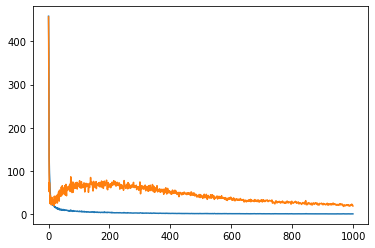

In [51]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [481]:
model = Sequential()
model.add(Dense(128, activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
#model.add(Dropout(0.2))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

In [482]:
model.summary()

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_306 (Dense)           (None, 128)               9344      
                                                                 
 dense_307 (Dense)           (None, 64)                8256      
                                                                 
 dense_308 (Dense)           (None, 64)                4160      
                                                                 
 dense_309 (Dense)           (None, 64)                4160      
                                                                 
 dense_310 (Dense)           (None, 64)                4160      
                                                                 
 dense_311 (Dense)           (None, 64)                4160      
                                                                 
 dense_312 (Dense)           (None, 64)              

In [483]:
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [484]:
from sklearn.metrics import *

In [491]:
history = model.fit(X_train, y_train, epochs = 100, validation_split = 0.2)

Epoch 1/100
17/17 [==============================] - 0s 6ms/step - loss: 0.0942 - val_loss: 1.0236
Epoch 2/100
17/17 [==============================] - 0s 4ms/step - loss: 0.1394 - val_loss: 0.8680
Epoch 3/100
17/17 [==============================] - 0s 4ms/step - loss: 0.2090 - val_loss: 1.1568
Epoch 4/100
17/17 [==============================] - 0s 4ms/step - loss: 0.3457 - val_loss: 1.1106
Epoch 5/100
17/17 [==============================] - 0s 4ms/step - loss: 0.3833 - val_loss: 1.0983
Epoch 6/100
17/17 [==============================] - 0s 4ms/step - loss: 0.6208 - val_loss: 1.3471
Epoch 7/100
17/17 [==============================] - 0s 4ms/step - loss: 0.5218 - val_loss: 1.2307
Epoch 8/100
17/17 [==============================] - 0s 4ms/step - loss: 0.3500 - val_loss: 1.3441
Epoch 9/100
17/17 [==============================] - 0s 4ms/step - loss: 0.3743 - val_loss: 1.0671
Epoch 10/100
17/17 [==============================] - 0s 4ms/step - loss: 0.2273 - val_loss: 1.2246
Epoch 11/

17/17 [==============================] - 0s 4ms/step - loss: 0.0770 - val_loss: 0.7121
Epoch 84/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0671 - val_loss: 0.7929
Epoch 85/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0604 - val_loss: 0.7215
Epoch 86/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0601 - val_loss: 0.6743
Epoch 87/100
17/17 [==============================] - 0s 4ms/step - loss: 0.1068 - val_loss: 0.7409
Epoch 88/100
17/17 [==============================] - 0s 4ms/step - loss: 0.1874 - val_loss: 0.7504
Epoch 89/100
17/17 [==============================] - 0s 4ms/step - loss: 0.1656 - val_loss: 0.7789
Epoch 90/100
17/17 [==============================] - 0s 4ms/step - loss: 0.2259 - val_loss: 1.2252
Epoch 91/100
17/17 [==============================] - 0s 4ms/step - loss: 0.7858 - val_loss: 2.5515
Epoch 92/100
17/17 [==============================] - 0s 4ms/step - loss: 0.9673 - val_loss: 0.9726
Epoch 93/100


In [492]:
y_pred = model.predict(X_test)

4/4 [==============================] - 0s 2ms/step


In [493]:
r2_score(y_test, y_pred)*100

40.23032321898504

In [494]:
mean_absolute_error(y_test, y_pred)

2.101204831109165

In [495]:
mean_squared_error(y_test, y_pred)

7.22825210676029

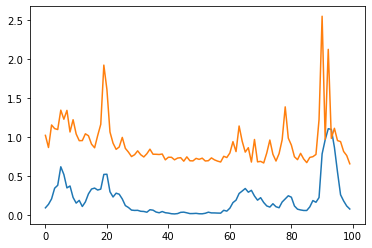

In [496]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [497]:
model = Sequential()
model.add(Dense(128, activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(64, activation = 'tanh'))
#model.add(Dropout(0.2))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(64, activation = 'tanh'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(64, activation = 'tanh'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(64, activation = 'tanh'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

In [498]:
model.summary()

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_317 (Dense)           (None, 128)               9344      
                                                                 
 dense_318 (Dense)           (None, 64)                8256      
                                                                 
 dense_319 (Dense)           (None, 64)                4160      
                                                                 
 dense_320 (Dense)           (None, 64)                4160      
                                                                 
 dense_321 (Dense)           (None, 64)                4160      
                                                                 
 dense_322 (Dense)           (None, 64)                4160      
                                                                 
 dense_323 (Dense)           (None, 64)              

In [499]:
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [500]:
history = model.fit(X_train, y_train, epochs = 100, validation_split = 0.2)

Epoch 1/100
17/17 [==============================] - 1s 11ms/step - loss: 374.2405 - val_loss: 251.6375
Epoch 2/100
17/17 [==============================] - 0s 4ms/step - loss: 150.4315 - val_loss: 73.0094
Epoch 3/100
17/17 [==============================] - 0s 4ms/step - loss: 32.3961 - val_loss: 9.1281
Epoch 4/100
17/17 [==============================] - 0s 3ms/step - loss: 10.4171 - val_loss: 6.2590
Epoch 5/100
17/17 [==============================] - 0s 3ms/step - loss: 10.8157 - val_loss: 6.1768
Epoch 6/100
17/17 [==============================] - 0s 4ms/step - loss: 10.0467 - val_loss: 6.7766
Epoch 7/100
17/17 [==============================] - 0s 4ms/step - loss: 10.1704 - val_loss: 6.5598
Epoch 8/100
17/17 [==============================] - 0s 4ms/step - loss: 10.0713 - val_loss: 6.3127
Epoch 9/100
17/17 [==============================] - 0s 4ms/step - loss: 10.0850 - val_loss: 6.4277
Epoch 10/100
17/17 [==============================] - 0s 4ms/step - loss: 10.0814 - val_loss: 

17/17 [==============================] - 0s 4ms/step - loss: 0.7486 - val_loss: 0.9024
Epoch 83/100
17/17 [==============================] - 0s 4ms/step - loss: 0.6124 - val_loss: 0.8187
Epoch 84/100
17/17 [==============================] - 0s 4ms/step - loss: 0.5556 - val_loss: 0.7913
Epoch 85/100
17/17 [==============================] - 0s 4ms/step - loss: 0.4882 - val_loss: 0.8193
Epoch 86/100
17/17 [==============================] - 0s 4ms/step - loss: 0.4360 - val_loss: 0.6813
Epoch 87/100
17/17 [==============================] - 0s 4ms/step - loss: 0.4003 - val_loss: 0.6776
Epoch 88/100
17/17 [==============================] - 0s 4ms/step - loss: 0.4408 - val_loss: 0.7786
Epoch 89/100
17/17 [==============================] - 0s 4ms/step - loss: 0.3792 - val_loss: 0.6484
Epoch 90/100
17/17 [==============================] - 0s 4ms/step - loss: 0.2758 - val_loss: 0.6353
Epoch 91/100
17/17 [==============================] - 0s 4ms/step - loss: 0.2305 - val_loss: 0.6023
Epoch 92/100


Epoch 1/100
17/17 [==============================] - 1s 10ms/step - loss: 427.1524 - val_loss: 352.1565
Epoch 2/100
17/17 [==============================] - 0s 3ms/step - loss: 192.2729 - val_loss: 144.3001
Epoch 3/100
17/17 [==============================] - 0s 3ms/step - loss: 94.8421 - val_loss: 85.1043
Epoch 4/100
17/17 [==============================] - 0s 3ms/step - loss: 68.9010 - val_loss: 64.1716
Epoch 5/100
17/17 [==============================] - 0s 4ms/step - loss: 52.3219 - val_loss: 49.0138
Epoch 6/100
17/17 [==============================] - 0s 3ms/step - loss: 40.2365 - val_loss: 37.5518
Epoch 7/100
17/17 [==============================] - 0s 3ms/step - loss: 31.3065 - val_loss: 29.0505
Epoch 8/100
17/17 [==============================] - 0s 3ms/step - loss: 24.7886 - val_loss: 22.7504
Epoch 9/100
17/17 [==============================] - 0s 3ms/step - loss: 20.0807 - val_loss: 18.0437
Epoch 10/100
17/17 [==============================] - 0s 4ms/step - loss: 16.7723 - va

17/17 [==============================] - 0s 4ms/step - loss: 1.7850 - val_loss: 1.1203
Epoch 83/100
17/17 [==============================] - 0s 4ms/step - loss: 1.7023 - val_loss: 1.0938
Epoch 84/100
17/17 [==============================] - 0s 4ms/step - loss: 1.6269 - val_loss: 1.1184
Epoch 85/100
17/17 [==============================] - 0s 4ms/step - loss: 1.7075 - val_loss: 1.0992
Epoch 86/100
17/17 [==============================] - 0s 4ms/step - loss: 1.4749 - val_loss: 1.1391
Epoch 87/100
17/17 [==============================] - 0s 4ms/step - loss: 1.4424 - val_loss: 1.1008
Epoch 88/100
17/17 [==============================] - 0s 3ms/step - loss: 1.4129 - val_loss: 1.1230
Epoch 89/100
17/17 [==============================] - 0s 3ms/step - loss: 1.3785 - val_loss: 1.1112
Epoch 90/100
17/17 [==============================] - 0s 3ms/step - loss: 1.4394 - val_loss: 1.0500
Epoch 91/100
17/17 [==============================] - 0s 3ms/step - loss: 1.3826 - val_loss: 1.1477
Epoch 92/100


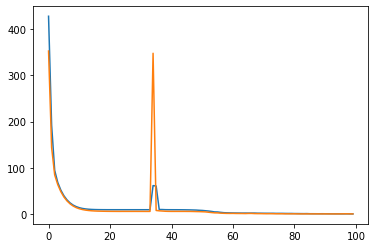

In [511]:
model = Sequential()
model.add(Dense(128, activation = 'tanh', input_dim = X_train.shape[1]))
model.add(Dense(64, activation = 'tanh'))
model.add(Dense(64, activation = 'tanh'))
#model.add(Dropout(0.2))
model.add(Dense(64, activation = 'tanh'))
model.add(Dense(64, activation = 'tanh'))
model.add(Dense(64, activation = 'tanh'))
model.add(Dense(64, activation = 'tanh'))
model.add(Dense(64, activation = 'tanh'))
model.add(Dense(64, activation = 'tanh'))
model.add(Dense(64, activation = 'tanh'))
model.add(Dense(1, activation = 'linear'))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
history = model.fit(X_train, y_train, epochs = 100, validation_split = 0.2)
y_pred = model.predict(X_test)


In [514]:
R2_score = r2_score(y_test, y_pred)*100
mae = mean_absolute_error(y_test, y_pred)
mse  = mean_squared_error(y_test, y_pred)


In [527]:
R2_score

51.666070292958665

In [518]:
mae

1.8576466862323855

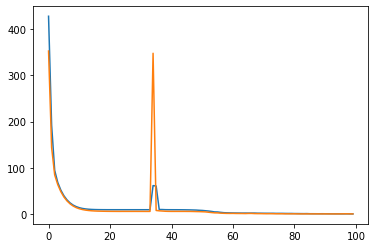

In [515]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [519]:
result = pd.DataFrame()
result['Mean Absolute Error'] = [mae,'NAN']
result['Mean Squared Error'] = [mse,'NAN']
result['R2 Score'] = [R2_score,'NAN']


In [522]:
result.to_csv("regdlresult.csv")

In [512]:
!pip install h5py

In [525]:

# equivalent to: model.save("model.h5")
from tensorflow.keras.models import save_model, load_model
#save_model(model, "reg.h5")

In [526]:
model = load_model('reg.h5')

In [ ]:
reg.h5